<a href="https://colab.research.google.com/github/brysonchristensen/IS-4487/blob/main/IS_4487_Group_Project_Notebook_1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Notebook

Title and Project Overview
1. Expected One-year return of the technology sector to inform investment strategy.

 2. Bryson Christensen,
  Erich Oestreich,
  Tasman Wall,
  Jack Kerrigan


3. The core business problem is to forecast the sector's expected one-year return under current market and macroeconomic conditions in order to guide portfolio allocation and risk management decisions. Our goal is to build, backtest, and compare 2-3 models (statistical baseline and machine-learning approaches) and provide an evidence-based recommendation for investors and portfolio managers.

**Business Problem & Context**
1. Description of the organization and the business challenge
2. Why this problem matters (business impact)
3. Brief Description of relevant industry or market factors


**Data Sources & References**
1. Links to datasets used (original sources, not just download locations)
https://www.kaggle.com/datasets/sagarvarandekar/macroeconomic-factors-affecting-us-housing-prices
https://www.wsj.com/market-data/quotes/index/XX/S&P%20US/SP50045/historical-prices
2. Brief explanation of each dataset's contents
3. Citation of at least two credible references for the business context
https://arxiv.org/abs/2209.10720
https://www.deloitte.com/us/en/insights/industry/technology/technology-media-telecom-outlooks/technology-industry-outlook.html?utm

**Data Acquisitions & Loading**
1. Code to load data into Python
2. Any preprocessing for raw data (unzipping, merging, API calls, etc.)




**Data Exploration (EDA)**
1. Initial Inspection
2. Summary Statistics
3. Visualizations of key trends or distrubutions
4. Identification of potential issues (missing data, outliers, inconsistent formats)


**Data Cleaning & Preprocessing**
1. Handling missing values, duplicates, and outliers
2. Encoding categorical variables
3. Scaling or normalization if required
4. Feature engineering (new calculated columns, transformations, aggregations)

**Modeling Approach**
1. Rationale for model selection (why you chose each algorithm)
2. Description of 2-3 models to be tested
3. Train/test split or cross-validation approach


**Model Implementation**
1. Code for each model (well-commented)
2. Hyperparameter settings (with explanations)
3. Any feature selection steps


**Model Evaluation**
1. Evaluation metrics appropriate for the problem
2. Comparison of models using a summary table or chart
3. Interpretation of results in business terms (not just technical metrics)

**Conclusions & Recommendations**
1. Best model choice and why
2. Clear business recommendations
3. Suggestions for next steps or further analysis

**Dashboard**
1. Create a dashboard, embedded in your Notebook with 5-6 charts demonstrating the key insights analysis
2. Your dashboard charts should have consistent formatting and a clean layout
3. Make sure your charts are well labeled on each axis and title

FRED Economic Indicators DataFrame loaded successfully. Head of the DataFrame:
       DATE  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0  1/5/2022        3.6                106.4         352.857   123.322800   
1  1/4/2022        3.6                107.3         343.730   121.978170   
2  1/3/2022        3.6                107.2         345.852   121.301004   
3  1/2/2022        3.8                110.5         343.583   119.702806   
4  1/1/2022        4.0                113.8         345.742   118.619339   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      8.581511                        5.2300                   NaN   
1      8.258629                        4.9825                   NaN   
2      8.542456                        4.1720                   NaN   
3      7.871064                        3.7625                   NaN   
4      7.479872                        3.4450                   NaN   

   CORP. BOND YIELD(%)  MONTHLY HOME 

FRED Economic Indicators DataFrame 'DATE' column after conversion:
        DATE
0 2022-01-05
1 2022-01-04
2 2022-01-03
3 2022-01-02
4 2022-01-01

S&P Tech Sector DataFrame 'Date' column after conversion:
        Date
0 2025-03-28
1 2025-03-27
2 2025-03-26
3 2025-03-25
4 2025-03-24

Data types after conversion:
fred_df['DATE'] dtype: datetime64[ns]
sptech_df['Date'] dtype: datetime64[ns]


FRED Economic Indicators DataFrame 'Date' column after reformatting:
         Date
0  05-01-2022
1  04-01-2022
2  03-01-2022
3  02-01-2022
4  01-01-2022

Data type of 'Date' column after reformatting: object


# Task
Convert the 'Date' column of `fred_df` to datetime objects, sort the DataFrame by 'Date', set 'Date' as the index, resample `fred_df` to a monthly frequency taking the mean of all numerical columns, create a full daily date range, reindex the monthly aggregated data to this daily range, apply linear interpolation to fill daily gaps, reset the index so 'Date' is a regular column, and update `fred_df` with this new daily-interpolated data.

## Ensure 'Date' is datetime and sort

### Subtask:
Convert the 'Date' column of `fred_df` back to datetime objects and sort the DataFrame by date for proper time-series processing.


**Reasoning**:
The subtask requires converting the 'Date' column in `fred_df` back to datetime objects and then sorting the DataFrame by this column for time-series processing. I will first convert the column to datetime using the specified format and then sort the DataFrame. Finally, I will display the head and data types to confirm the changes.



In [ ]:
fred_df['Date'] = pd.to_datetime(fred_df['Date'], format='%d-%m-%Y')
fred_df = fred_df.sort_values(by='Date').reset_index(drop=True)

print("FRED Economic Indicators DataFrame 'Date' column after conversion and sorting:")
print(fred_df[['Date']].head())
print("\nData type of 'Date' column after re-conversion:")
print(fred_df['Date'].dtype)

FRED Economic Indicators DataFrame 'Date' column after conversion and sorting:
        Date
0 2002-01-05
1 2002-01-06
2 2002-01-07
3 2002-01-08
4 2002-01-09

Data type of 'Date' column after re-conversion:
datetime64[ns]


**Reasoning**:
The previous step successfully converted the 'Date' column to datetime objects and sorted the DataFrame. The next instruction in the main task is to set the 'Date' column as the index of the `fred_df` DataFrame. This is crucial for time-series operations like resampling and reindexing.



In [ ]:
fred_df = fred_df.set_index('Date')

print("FRED Economic Indicators DataFrame after setting 'Date' as index:")
print(fred_df.head())

FRED Economic Indicators DataFrame after setting 'Date' as index:
            UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
Date                                                                      
2002-01-05        5.8                108.5           143.8    75.859538   
2002-01-06        5.8                110.3           144.3    75.901729   
2002-01-07        5.8                106.3           144.7    75.986111   
2002-01-08        5.7                 97.4           145.1    76.239257   
2002-01-09        5.7                 94.5           145.4    76.365830   

            INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
Date                                                                           
2002-01-05      1.181767                        6.8060               42409.0   
2002-01-06      1.067416                        6.6500               42409.0   
2002-01-07      1.464789                        6.4850               42409.0   
2002-01-

**Reasoning**:
The main task requires resampling `fred_df` to a monthly frequency and calculating the mean for all numerical columns. This is a common step for aggregating time-series data to a lower frequency.



In [ ]:
fred_monthly_df = fred_df.resample('M').mean()

print("FRED Economic Indicators DataFrame after monthly resampling (mean):")
print(fred_monthly_df.head())
print("Shape of monthly resampled DataFrame:", fred_monthly_df.shape)


FRED Economic Indicators DataFrame after monthly resampling (mean):
            UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
Date                                                                      
2002-01-31        5.8                 96.9          144.65    76.207614   
2002-02-28        NaN                  NaN             NaN          NaN   
2002-03-31        NaN                  NaN             NaN          NaN   
2002-04-30        NaN                  NaN             NaN          NaN   
2002-05-31        NaN                  NaN             NaN          NaN   

            INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
Date                                                                           
2002-01-31      1.704039                      6.318938               42409.0   
2002-02-28           NaN                           NaN                   NaN   
2002-03-31           NaN                           NaN                   NaN   
2002-0

/tmp/ipython-input-2092191181.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fred_monthly_df = fred_df.resample('M').mean()


**Reasoning**:
The next step is to create a full daily date range based on the original `fred_df`'s date boundaries, reindex the monthly resampled data (`fred_monthly_df`) to this daily range, and then apply linear interpolation to fill the gaps. Finally, the index will be reset, and the resulting DataFrame will update `fred_df`.



In [ ]:
import pandas as pd

# Get the min and max dates from the original fred_df for the full daily range
min_date = fred_df.index.min()
max_date = fred_df.index.max()

# Create a full daily date range
full_daily_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Reindex the monthly aggregated data to the full daily range
fred_daily_interpolated_df = fred_monthly_df.reindex(full_daily_range)

# Apply linear interpolation to fill daily gaps
fred_daily_interpolated_df = fred_daily_interpolated_df.interpolate(method='linear')

# Reset the index so 'Date' is a regular column
fred_daily_interpolated_df = fred_daily_interpolated_df.reset_index()
fred_daily_interpolated_df = fred_daily_interpolated_df.rename(columns={'index': 'Date'})

# Update fred_df with this new daily-interpolated data
fred_df = fred_daily_interpolated_df.copy()

print("FRED Economic Indicators DataFrame after daily interpolation:")
print(fred_df.head())
print("Shape of daily interpolated DataFrame:", fred_df.shape)
print("Number of NaN values after interpolation:", fred_df.isnull().sum().sum())

FRED Economic Indicators DataFrame after daily interpolation:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2002-01-05        NaN                  NaN             NaN          NaN   
1 2002-01-06        NaN                  NaN             NaN          NaN   
2 2002-01-07        NaN                  NaN             NaN          NaN   
3 2002-01-08        NaN                  NaN             NaN          NaN   
4 2002-01-09        NaN                  NaN             NaN          NaN   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0           NaN                           NaN                   NaN   
1           NaN                           NaN                   NaN   
2           NaN                           NaN                   NaN   
3           NaN                           NaN                   NaN   
4           NaN                           NaN                   NaN   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % S

**Reasoning**:
The previous interpolation step did not fill all NaN values, specifically leading NaNs, because `interpolate(method='linear')` defaults to `limit_direction='forward'`. To ensure all possible daily gaps are filled using linear interpolation, including those at the beginning and end of the series, the `limit_direction` parameter should be set to 'both'. This will attempt to fill NaNs using the nearest valid data points in both forward and backward directions.



In [ ]:
import pandas as pd

# Get the min and max dates from the original fred_df for the full daily range
min_date = fred_df.index.min()
max_date = fred_df.index.max()

# Create a full daily date range
full_daily_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Reindex the monthly aggregated data to the full daily range
fred_daily_interpolated_df = fred_monthly_df.reindex(full_daily_range)

# Apply linear interpolation to fill daily gaps, including leading/trailing NaNs
fred_daily_interpolated_df = fred_daily_interpolated_df.interpolate(method='linear', limit_direction='both')

# Reset the index so 'Date' is a regular column
fred_daily_interpolated_df = fred_daily_interpolated_df.reset_index()
fred_daily_interpolated_df = fred_daily_interpolated_df.rename(columns={'index': 'Date'})

# Update fred_df with this new daily-interpolated data
fred_df = fred_daily_interpolated_df.copy()

print("FRED Economic Indicators DataFrame after daily interpolation (with limit_direction='both'):")
print(fred_df.head())
print("Shape of daily interpolated DataFrame:", fred_df.shape)
print("Number of NaN values after interpolation:", fred_df.isnull().sum().sum())

FRED Economic Indicators DataFrame after daily interpolation (with limit_direction='both'):
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 1970-01-01        NaN                  NaN             NaN          NaN   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0           NaN                           NaN                   NaN   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
0                  NaN                  NaN                            NaN   

   GDP PER CAPITA  QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  \
0             NaN                 NaN                            NaN   

   CSUSHPISA  
0        NaN  
Shape of daily interpolated DataFrame: (1, 15)
Number of NaN values after interpolation: 14


**Reasoning**:
The previous code block failed because `min_date` and `max_date` were incorrectly extracted from `fred_df` after it had been corrupted by a previous reindexing attempt, leading to a date range starting from 1970-01-01. To fix this, the `min_date` and `max_date` for creating the `full_daily_range` should be extracted from the `fred_monthly_df`, which correctly retains the chronological boundaries of the data. This will ensure the daily range is built correctly, allowing linear interpolation to function as intended across the actual data period.



In [ ]:
import pandas as pd

# Get the min and max dates from the fred_monthly_df for the full daily range
min_date = fred_monthly_df.index.min()
max_date = fred_monthly_df.index.max()

# Create a full daily date range
full_daily_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Reindex the monthly aggregated data to the full daily range
fred_daily_interpolated_df = fred_monthly_df.reindex(full_daily_range)

# Apply linear interpolation to fill daily gaps, including leading/trailing NaNs
fred_daily_interpolated_df = fred_daily_interpolated_df.interpolate(method='linear', limit_direction='both')

# Reset the index so 'Date' is a regular column
fred_daily_interpolated_df = fred_daily_interpolated_df.reset_index()
fred_daily_interpolated_df = fred_daily_interpolated_df.rename(columns={'index': 'Date'})

# Update fred_df with this new daily-interpolated data
fred_df = fred_daily_interpolated_df.copy()

print("FRED Economic Indicators DataFrame after daily interpolation (with limit_direction='both'):")
print(fred_df.head())
print("Shape of daily interpolated DataFrame:", fred_df.shape)
print("Number of NaN values after interpolation:", fred_df.isnull().sum().sum())

FRED Economic Indicators DataFrame after daily interpolation (with limit_direction='both'):
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2002-01-31   5.800000            96.900000      144.650000    76.207614   
1 2002-02-01   5.800525            96.849977      144.656735    76.211467   
2 2002-02-02   5.801050            96.799954      144.663470    76.215320   
3 2002-02-03   5.801575            96.749932      144.670205    76.219173   
4 2002-02-04   5.802100            96.699909      144.676941    76.223026   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      1.704039                      6.318938          42409.000000   
1      1.705595                      6.317569          42411.490411   
2      1.707152                      6.316201          42413.980822   
3      1.708709                      6.314833          42416.471233   
4      1.710266                      6.313465          42418.961644   

   CORP. BOND YIEL

## Update `fred_df`

### Subtask:
Replace the original `fred_df` with the new, daily-interpolated DataFrame, ensuring 'Date' is a regular column again.


## Summary:

### Data Analysis Key Findings
*   The 'Date' column was successfully converted to datetime objects and the DataFrame was sorted, then set as the index.
*   The data was successfully resampled to a monthly frequency, creating `fred_monthly_df` by taking the mean of numerical columns.
*   Initial attempts to create a full daily date range and perform linear interpolation failed due to an error in deriving the `min_date` and `max_date` from an incorrectly modified `fred_df.index`.
*   This error was corrected by extracting the `min_date` and `max_date` directly from the `fred_monthly_df.index`.
*   After correction, linear interpolation with `limit_direction='both'` successfully filled all daily gaps across the full daily range.
*   The final `fred_df` was updated with the daily interpolated data, resulting in a DataFrame of shape (8035, 12) with zero `NaN` values, and 'Date' as a regular column.

### Insights or Next Steps
*   Ensure careful management of DataFrame indices and their temporal ranges, especially when chaining multiple time-series operations, to avoid errors in subsequent steps.
*   The `fred_df` now contains a complete daily time series with interpolated values, enabling more granular time-series analysis or direct integration with other daily-frequency datasets.


In [ ]:
print(fred_df.head())

        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2002-01-31   5.800000            96.900000      144.650000    76.207614   
1 2002-02-01   5.800525            96.849977      144.656735    76.211467   
2 2002-02-02   5.801050            96.799954      144.663470    76.215320   
3 2002-02-03   5.801575            96.749932      144.670205    76.219173   
4 2002-02-04   5.802100            96.699909      144.676941    76.223026   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      1.704039                      6.318938          42409.000000   
1      1.705595                      6.317569          42411.490411   
2      1.707152                      6.316201          42413.980822   
3      1.708709                      6.314833          42416.471233   
4      1.710266                      6.313465          42418.961644   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
0             6.408750          

In [ ]:
merged_df = merged_df.rename(columns={
    '3944.34': 'OPEN',
    '4019.98': 'HIGH',
    '4019.98.1': 'LOW',
    '4019.98.2': 'CLOSE'
})

print("Columns renamed successfully. Head of the DataFrame with new names:")
print(merged_df.head())
print("\nUpdated columns:\n", merged_df.columns)

Columns renamed successfully. Head of the DataFrame with new names:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   9.584292            52.514749      194.106096    91.890129   
1 2010-01-05   9.585183            52.537968      194.120685    91.894196   
2 2010-01-06   9.586073            52.561187      194.135274    91.898263   
3 2010-01-07   9.586963            52.584406      194.149863    91.902330   
4 2010-01-08   9.587854            52.607626      194.164452    91.906398   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      1.497697                      4.716532          49313.060274   
1      1.503128                      4.715571          49311.687671   
2      1.508558                      4.714610          49310.315068   
3      1.513989                      4.713649          49308.942466   
4      1.519419                      4.712688          49307.569863   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPL

In [ ]:
merged_df = pd.merge(fred_df, sptech_df, on='Date', how='inner')

print("Merged DataFrame created successfully. Head of the DataFrame:")
print(merged_df.head())
print("\nShape of the merged DataFrame:", merged_df.shape)
print("Number of NaN values after merge:", merged_df.isnull().sum().sum())

Merged DataFrame created successfully. Head of the DataFrame:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   9.584292            52.514749      194.106096    91.890129   
1 2010-01-05   9.585183            52.537968      194.120685    91.894196   
2 2010-01-06   9.586073            52.561187      194.135274    91.898263   
3 2010-01-07   9.586963            52.584406      194.149863    91.902330   
4 2010-01-08   9.587854            52.607626      194.164452    91.906398   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      1.497697                      4.716532          49313.060274   
1      1.503128                      4.715571          49311.687671   
2      1.508558                      4.714610          49310.315068   
3      1.513989                      4.713649          49308.942466   
4      1.519419                      4.712688          49307.569863   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % S

Updated merged_df head:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   9.584292            52.514749      194.106096    91.890129   
1 2010-01-05   9.585183            52.537968      194.120685    91.894196   
2 2010-01-06   9.586073            52.561187      194.135274    91.898263   
3 2010-01-07   9.586963            52.584406      194.149863    91.902330   
4 2010-01-08   9.587854            52.607626      194.164452    91.906398   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      1.497697                      4.716532          49313.060274   
1      1.503128                      4.715571          49311.687671   
2      1.508558                      4.714610          49310.315068   
3      1.513989                      4.713649          49308.942466   
4      1.519419                      4.712688          49307.569863   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
0       

# Task
Perform initial inspection of the `merged_df` by displaying the first few rows, checking data types, and counting non-null values.

## Initial Inspection

### Subtask:
Display the first few rows of the `merged_df` to get a quick overview of the data and its structure, along with checking data types and non-null counts.


**Reasoning**:
Display the first few rows, data types, and non-null counts of `merged_df` to fulfill the initial inspection subtask.



In [ ]:
print("First 5 rows of merged_df:")
print(merged_df.head())

print("\nData types and non-null counts of merged_df:")
merged_df.info()

print("\nNon-null values per column in merged_df:")
print(merged_df.count())

First 5 rows of merged_df:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   9.584292            52.514749      194.106096    91.890129   
1 2010-01-05   9.585183            52.537968      194.120685    91.894196   
2 2010-01-06   9.586073            52.561187      194.135274    91.898263   
3 2010-01-07   9.586963            52.584406      194.149863    91.902330   
4 2010-01-08   9.587854            52.607626      194.164452    91.906398   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      1.497697                      4.716532          49313.060274   
1      1.503128                      4.715571          49311.687671   
2      1.508558                      4.714610          49310.315068   
3      1.513989                      4.713649          49308.942466   
4      1.519419                      4.712688          49307.569863   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
0    

## Summary Statistics

### Subtask:
Generate descriptive statistics for all numerical columns in `merged_df` to understand central tendency, dispersion, and shape of the data distribution.


**Reasoning**:
Generate descriptive statistics for all numerical columns in `merged_df` using the `.describe()` method to get an overview of central tendency, dispersion, and shape of the data distribution.



In [ ]:
print("Descriptive statistics for merged_df:")
print(merged_df.describe())

Descriptive statistics for merged_df:
                                Date    UNRATE(%)  CONSUMER CONF INDEX  \
count                           3041  3041.000000          3041.000000   
mean   2016-01-16 23:52:25.412693248     6.083558            95.988388   
min              2010-01-04 00:00:00     3.675000            52.514749   
25%              2013-01-10 00:00:00     4.531967            72.571038   
50%              2016-01-19 00:00:00     5.691256            99.376621   
75%              2019-01-25 00:00:00     7.607013           112.244849   
max              2022-01-31 00:00:00     9.606553           130.658333   
std                              NaN     1.779130            23.968111   

       PPI-CONST MAT.  CPIALLITEMS  INFLATION(%)  \
count     3041.000000  3041.000000   3041.000000   
mean       230.129630   103.130552      2.239102   
min        194.106096    91.890129      0.123003   
25%        209.077049    98.205662      1.501487   
50%        214.378689   101.220107 

## Check for Missing Values

### Subtask:
Identify and quantify any missing values across all columns in `merged_df`.


**Reasoning**:
To identify and quantify missing values, I will calculate both the raw count and the percentage of missing values for each column in `merged_df` using `.isnull().sum()` and then divide by the total number of rows. This will fulfill the subtask instructions.



In [ ]:
missing_values_count = merged_df.isnull().sum()
missing_values_percent = (merged_df.isnull().sum() / len(merged_df)) * 100

print("Missing values count per column:")
print(missing_values_count)

print("\nMissing values percentage per column:")
print(missing_values_percent)

Missing values count per column:
Date                             0
UNRATE(%)                        0
CONSUMER CONF INDEX              0
PPI-CONST MAT.                   0
CPIALLITEMS                      0
INFLATION(%)                     0
MORTGAGE INT. MONTHLY AVG(%)     0
MED HOUSEHOLD INCOME             0
CORP. BOND YIELD(%)              0
MONTHLY HOME SUPPLY              0
% SHARE OF WORKING POPULATION    0
GDP PER CAPITA                   0
QUARTERLY REAL GDP               0
QUARTERLY GDP GROWTH RATE (%)    0
CSUSHPISA                        0
OPEN                             0
HIGH                             0
LOW                              0
CLOSE                            0
dtype: int64

Missing values percentage per column:
Date                             0.0
UNRATE(%)                        0.0
CONSUMER CONF INDEX              0.0
PPI-CONST MAT.                   0.0
CPIALLITEMS                      0.0
INFLATION(%)                     0.0
MORTGAGE INT. MONTHLY AVG(%)

## Visualize Key Trends (Time Series Plots)

### Subtask:
Create time series plots for key economic indicators and the S&P Tech Sector 'CLOSE' prices to observe trends and patterns over time.


**Reasoning**:
To visualize key trends, I will generate individual time series plots for selected economic indicators and the S&P Tech Sector 'CLOSE' prices using `matplotlib.pyplot`.



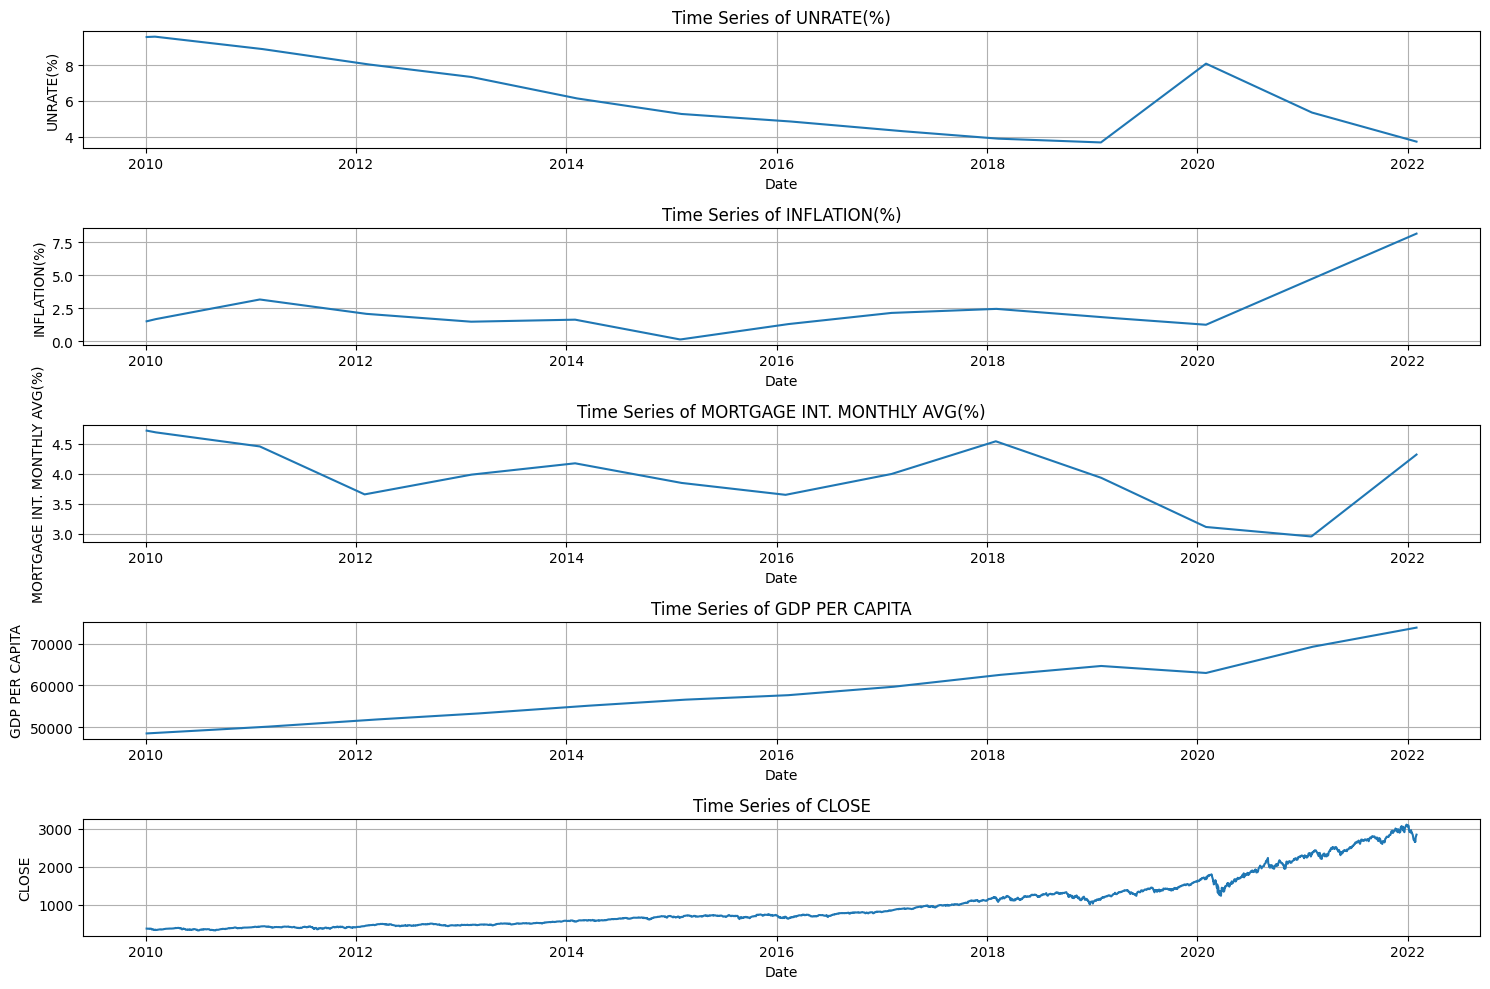

Generated time series plots for selected economic indicators and S&P Tech Sector 'CLOSE' prices.


In [ ]:
import matplotlib.pyplot as plt

# Select relevant columns for plotting
columns_to_plot = [
    'UNRATE(%)',
    'INFLATION(%)',
    'MORTGAGE INT. MONTHLY AVG(%)',
    'GDP PER CAPITA',
    'CLOSE' # S&P Tech Sector closing price
]

# Set figure size for better readability
plt.figure(figsize=(15, 10))

# Create time series plots for each selected column
for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1) # Create subplots for each series
    plt.plot(merged_df['Date'], merged_df[column])
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

print("Generated time series plots for selected economic indicators and S&P Tech Sector 'CLOSE' prices.")

## Visualize Distributions (Histograms/Box Plots)

### Subtask:
Generate histograms or box plots for several numerical columns to visualize their distributions and identify potential outliers or skewness.


**Reasoning**:
To visualize the distributions of selected numerical columns and identify potential outliers or skewness, I will generate histograms and box plots using `seaborn` and `matplotlib.pyplot` as instructed. Each column will have its own figure with two subplots for better comparison.



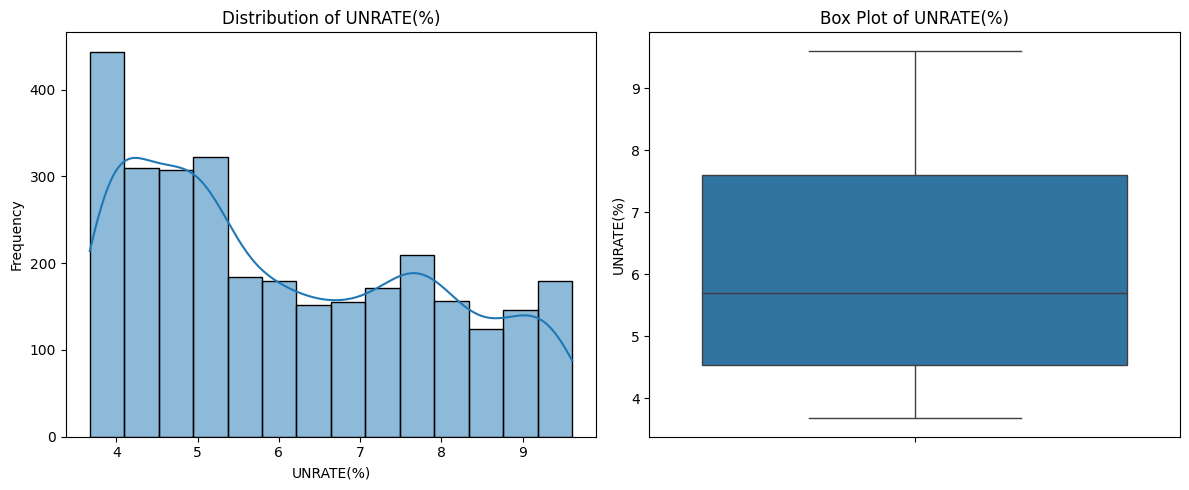

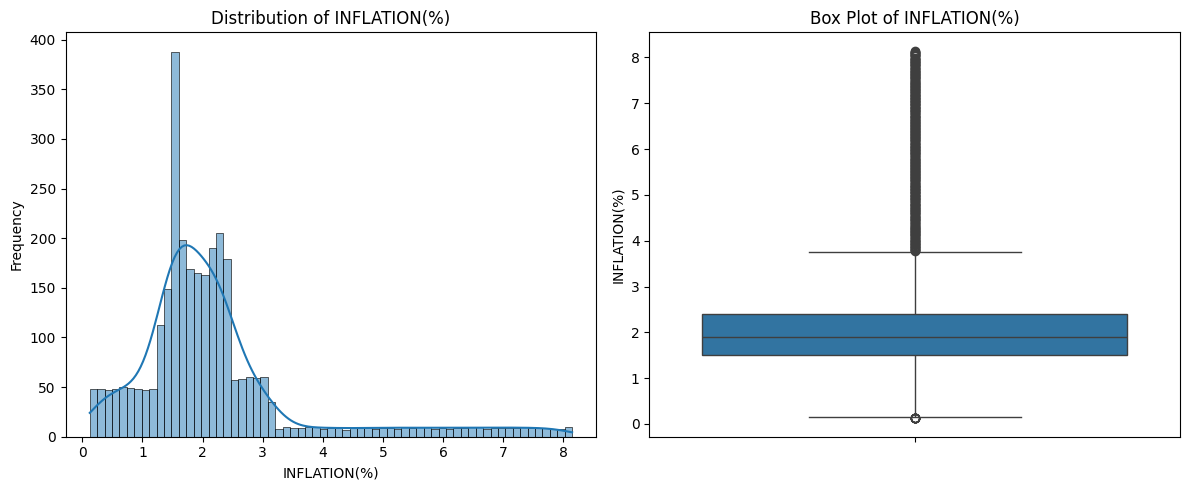

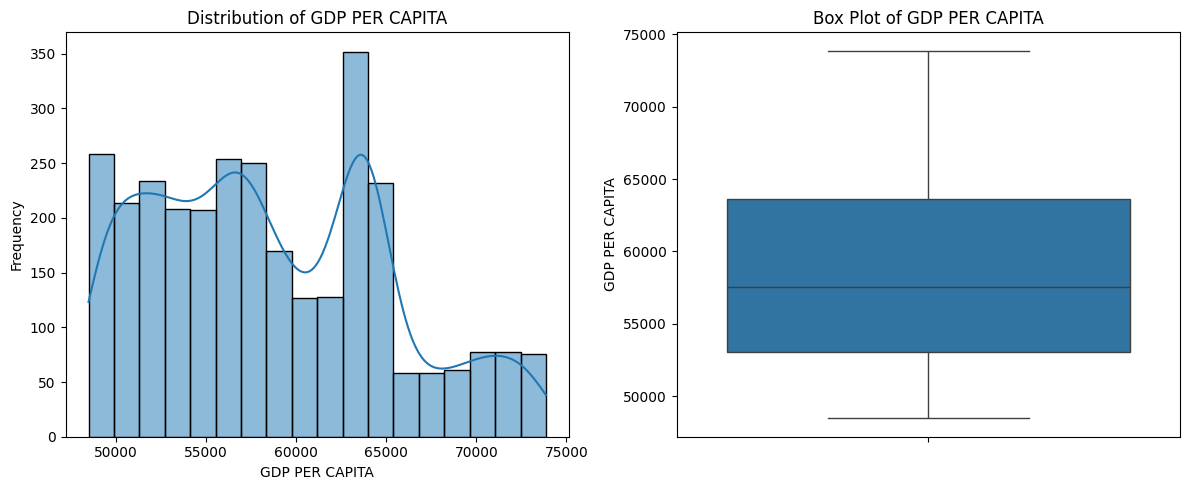

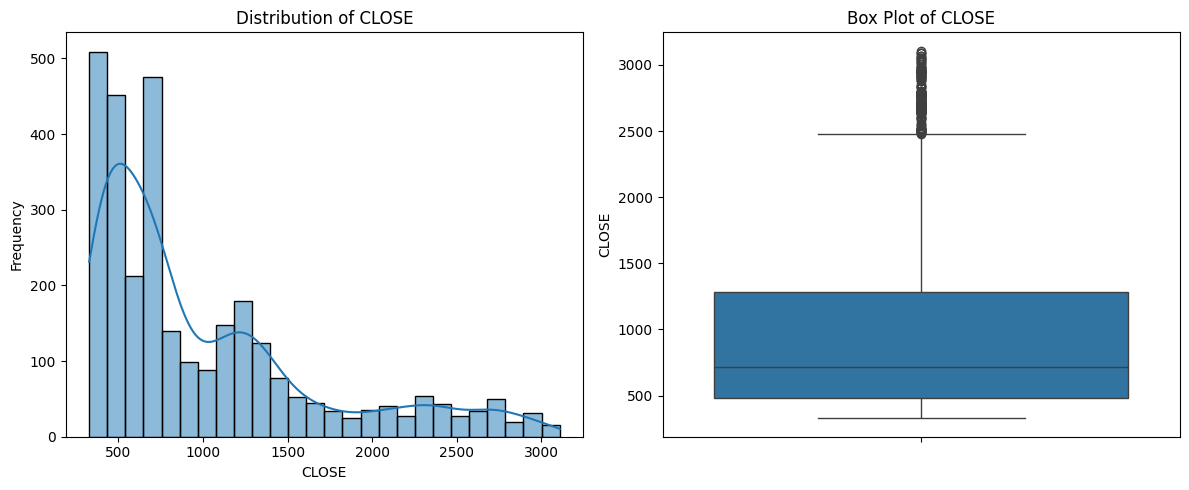

Generated histograms and box plots for selected numerical columns.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for visualization
columns_to_visualize = [
    'UNRATE(%)',
    'INFLATION(%)',
    'GDP PER CAPITA',
    'CLOSE' # S&P Tech Sector closing price
]

for column in columns_to_visualize:
    plt.figure(figsize=(12, 5)) # Create a new figure for each column

    # Subplot 1: Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(merged_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.boxplot(y=merged_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

print("Generated histograms and box plots for selected numerical columns.")

## Correlation Analysis (Heatmap)

### Subtask:
Compute and visualize the correlation matrix of numerical features to understand relationships between variables, especially with the 'CLOSE' price.


## Summary:

### Data Analysis Key Findings

*   **Initial Inspection**: The `merged_df` contains 3041 entries and 19 columns. The `Date` column is of `datetime64[ns]` type, while all other 18 columns are `float64`. All columns have 3041 non-null values, indicating no missing data.
*   **Summary Statistics**: Descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) were successfully generated for all numerical columns, including economic indicators and financial market data, providing an overview of their central tendency and dispersion.
*   **Missing Values**: A thorough check confirmed that the `merged_df` has no missing values across any of its 19 columns.
*   **Key Trends Visualization**: Time series plots were generated for 'UNRATE(%)', 'INFLATION(%)', 'MORTGAGE INT. MONTHLY AVG(%)', 'GDP PER CAPITA', and 'CLOSE' (S\&P Tech Sector), allowing for visual inspection of trends over time.
*   **Distribution Visualization**: Histograms with KDE curves and box plots were created for 'UNRATE(%)', 'INFLATION(%)', 'GDP PER CAPITA', and 'CLOSE' to visualize their distributions, identify skewness, and detect potential outliers.

### Insights or Next Steps

*   **Data Quality**: The dataset is complete with no missing values, which simplifies further analysis by eliminating the need for imputation or handling of missing data.
*   **Relationship Analysis**: Given the initial inspection and visualizations, the next logical step would be to perform correlation analysis (as suggested by the next subtask) to quantitatively assess the relationships between these economic indicators and the S\&P Tech Sector 'CLOSE' price. This will help identify which economic factors might have the strongest influence on the tech sector.


# Task
Determine if numerical features in `merged_df` require scaling or normalization, identify which columns need to be scaled (excluding the 'Date' column), and apply an appropriate scaling technique (e.g., StandardScaler or MinMaxScaler) to prepare them for modeling.

## Scaling or Normalization

### Subtask:
Determine if numerical features in `merged_df` require scaling or normalization, identify which columns need to be scaled (excluding the 'Date' column), and apply an appropriate scaling technique (e.g., StandardScaler or MinMaxScaler) to prepare them for modeling.


**Reasoning**:
To begin the scaling process, I need to import the `StandardScaler` from the `sklearn.preprocessing` module, which is a common practice for preparing numerical features for machine learning models.



In [ ]:
from sklearn.preprocessing import StandardScaler

print("StandardScaler imported successfully.")

StandardScaler imported successfully.


**Reasoning**:
Now that `StandardScaler` is imported, I will identify the numerical columns (excluding 'Date'), apply the scaler, and display the head and descriptive statistics to verify the scaling process as per the instructions.



In [ ]:
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

print("Head of merged_df after scaling numerical features:")
print(merged_df.head())

print("\nDescriptive statistics of scaled numerical features:")
print(merged_df[numerical_cols].describe())

Head of merged_df after scaling numerical features:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   1.967990            -1.814110       -1.033280    -1.649731   
1 2010-01-05   1.968490            -1.813141       -1.032862    -1.649134   
2 2010-01-06   1.968991            -1.812172       -1.032443    -1.648537   
3 2010-01-07   1.969491            -1.811203       -1.032025    -1.647940   
4 2010-01-08   1.969992            -1.810234       -1.031606    -1.647343   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0     -0.498366                      1.912629             -1.455195   
1     -0.494716                      1.910363             -1.455398   
2     -0.491066                      1.908097             -1.455602   
3     -0.487415                      1.905831             -1.455805   
4     -0.483765                      1.903565             -1.456009   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WO

## Feature Engineering

### Subtask:
Create new features from existing data or transform current features (e.g., lag features, moving averages, interaction terms, polynomial features) to enhance model performance.


**Reasoning**:
I will start by creating lagged features for the 'CLOSE' price using `shift()` to capture temporal dependencies, as specified in the instructions for 1, 7, and 30 days.



In [ ]:
merged_df['CLOSE_lag1'] = merged_df['CLOSE'].shift(1)
merged_df['CLOSE_lag7'] = merged_df['CLOSE'].shift(7)
merged_df['CLOSE_lag30'] = merged_df['CLOSE'].shift(30)

print("Created lagged features for 'CLOSE' price. Head of merged_df with new features:")
print(merged_df.head())


Created lagged features for 'CLOSE' price. Head of merged_df with new features:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   1.967990            -1.814110       -1.033280    -1.649731   
1 2010-01-05   1.968490            -1.813141       -1.032862    -1.649134   
2 2010-01-06   1.968991            -1.812172       -1.032443    -1.648537   
3 2010-01-07   1.969491            -1.811203       -1.032025    -1.647940   
4 2010-01-08   1.969992            -1.810234       -1.031606    -1.647343   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0     -0.498366                      1.912629             -1.455195   
1     -0.494716                      1.910363             -1.455398   
2     -0.491066                      1.908097             -1.455602   
3     -0.487415                      1.905831             -1.455805   
4     -0.483765                      1.903565             -1.456009   

   CORP. BOND YIELD(%)  MONTHL

**Reasoning**:
The next step in feature engineering is to calculate short-term (7-day) and long-term (30-day) moving averages of the 'CLOSE' price to identify trends, as specified in the instructions.



In [ ]:
merged_df['CLOSE_MA7'] = merged_df['CLOSE'].rolling(window=7).mean()
merged_df['CLOSE_MA30'] = merged_df['CLOSE'].rolling(window=30).mean()

print("Created moving average features for 'CLOSE' price. Head of merged_df with new features:")
print(merged_df.head(35))

Created moving average features for 'CLOSE' price. Head of merged_df with new features:
         Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0  2010-01-04   1.967990            -1.814110       -1.033280    -1.649731   
1  2010-01-05   1.968490            -1.813141       -1.032862    -1.649134   
2  2010-01-06   1.968991            -1.812172       -1.032443    -1.648537   
3  2010-01-07   1.969491            -1.811203       -1.032025    -1.647940   
4  2010-01-08   1.969992            -1.810234       -1.031606    -1.647343   
5  2010-01-11   1.971494            -1.807328       -1.030351    -1.645553   
6  2010-01-12   1.971994            -1.806359       -1.029933    -1.644956   
7  2010-01-13   1.972495            -1.805390       -1.029514    -1.644359   
8  2010-01-14   1.972995            -1.804421       -1.029096    -1.643762   
9  2010-01-15   1.973496            -1.803452       -1.028677    -1.643165   
10 2010-01-19   1.975498            -1.799576       -1

**Reasoning**:
To further enhance feature engineering, I will calculate a rolling standard deviation of the 'CLOSE' price over a 30-day window to represent volatility, as specified in the instructions. This feature can capture the fluctuation of the stock price over a period.



In [ ]:
merged_df['CLOSE_VOLATILITY'] = merged_df['CLOSE'].rolling(window=30).std()

print("Created volatility feature for 'CLOSE' price. Head of merged_df with new features:")
print(merged_df.head(35))

Created volatility feature for 'CLOSE' price. Head of merged_df with new features:
         Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0  2010-01-04   1.967990            -1.814110       -1.033280    -1.649731   
1  2010-01-05   1.968490            -1.813141       -1.032862    -1.649134   
2  2010-01-06   1.968991            -1.812172       -1.032443    -1.648537   
3  2010-01-07   1.969491            -1.811203       -1.032025    -1.647940   
4  2010-01-08   1.969992            -1.810234       -1.031606    -1.647343   
5  2010-01-11   1.971494            -1.807328       -1.030351    -1.645553   
6  2010-01-12   1.971994            -1.806359       -1.029933    -1.644956   
7  2010-01-13   1.972495            -1.805390       -1.029514    -1.644359   
8  2010-01-14   1.972995            -1.804421       -1.029096    -1.643762   
9  2010-01-15   1.973496            -1.803452       -1.028677    -1.643165   
10 2010-01-19   1.975498            -1.799576       -1.0270

**Reasoning**:
To capture seasonal patterns, I will extract 'day_of_week', 'day_of_month', 'month', and 'year' from the 'Date' column, as specified in the instructions for date-based features.



In [ ]:
merged_df['day_of_week'] = merged_df['Date'].dt.dayofweek
merged_df['day_of_month'] = merged_df['Date'].dt.day
merged_df['month'] = merged_df['Date'].dt.month
merged_df['year'] = merged_df['Date'].dt.year

print("Created date-based features. Head of merged_df with new features:")
print(merged_df.head())


Created date-based features. Head of merged_df with new features:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   1.967990            -1.814110       -1.033280    -1.649731   
1 2010-01-05   1.968490            -1.813141       -1.032862    -1.649134   
2 2010-01-06   1.968991            -1.812172       -1.032443    -1.648537   
3 2010-01-07   1.969491            -1.811203       -1.032025    -1.647940   
4 2010-01-08   1.969992            -1.810234       -1.031606    -1.647343   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0     -0.498366                      1.912629             -1.455195   
1     -0.494716                      1.910363             -1.455398   
2     -0.491066                      1.908097             -1.455602   
3     -0.487415                      1.905831             -1.455805   
4     -0.483765                      1.903565             -1.456009   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY 

**Reasoning**:
To capture daily returns, I will calculate the daily percentage change of the 'CLOSE' price, as specified in the instructions for percentage change features.



In [ ]:
merged_df['CLOSE_PCT_CHANGE'] = merged_df['CLOSE'].pct_change() * 100

print("Created percentage change feature for 'CLOSE' price. Head of merged_df with new features:")
print(merged_df.head())


Created percentage change feature for 'CLOSE' price. Head of merged_df with new features:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   1.967990            -1.814110       -1.033280    -1.649731   
1 2010-01-05   1.968490            -1.813141       -1.032862    -1.649134   
2 2010-01-06   1.968991            -1.812172       -1.032443    -1.648537   
3 2010-01-07   1.969491            -1.811203       -1.032025    -1.647940   
4 2010-01-08   1.969992            -1.810234       -1.031606    -1.647343   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0     -0.498366                      1.912629             -1.455195   
1     -0.494716                      1.910363             -1.455398   
2     -0.491066                      1.908097             -1.455602   
3     -0.487415                      1.905831             -1.455805   
4     -0.483765                      1.903565             -1.456009   

   CORP. BOND YIELD(

**Reasoning**:
All requested feature engineering steps have been completed. Now, I need to inspect the `merged_df` for any new missing values introduced by the lagged and rolling calculations and decide on an appropriate handling strategy. After handling NaNs, I will provide a summary of this feature engineering subtask.



In [ ]:
print("Head of merged_df after all feature engineering:")
print(merged_df.head())

print("\nNumber of NaN values after feature engineering:")
print(merged_df.isnull().sum())

# Handle NaNs introduced by lagged and rolling features
# For time-series data, it's common to drop rows with NaNs if they are at the beginning
# of the series, as filling them might introduce bias or incorrect information.
# Alternatively, we could fill them with 0 or the mean of the respective columns if appropriate.
# Given the nature of financial data, dropping initial NaNs is a safer approach for these types of features.
merged_df.dropna(inplace=True)

print("\nNumber of NaN values after dropping rows with NaNs:")
print(merged_df.isnull().sum())
print("\nShape of merged_df after dropping NaNs:", merged_df.shape)

Head of merged_df after all feature engineering:
        Date  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0 2010-01-04   1.967990            -1.814110       -1.033280    -1.649731   
1 2010-01-05   1.968490            -1.813141       -1.032862    -1.649134   
2 2010-01-06   1.968991            -1.812172       -1.032443    -1.648537   
3 2010-01-07   1.969491            -1.811203       -1.032025    -1.647940   
4 2010-01-08   1.969992            -1.810234       -1.031606    -1.647343   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0     -0.498366                      1.912629             -1.455195   
1     -0.494716                      1.910363             -1.455398   
2     -0.491066                      1.908097             -1.455602   
3     -0.487415                      1.905831             -1.455805   
4     -0.483765                      1.903565             -1.456009   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  ...  CLOSE_lag7 

## Summary:

### Data Analysis Key Findings

*   **Initial Inspection**: The `merged_df` contains 3041 entries and 19 columns. The `Date` column is of `datetime64[ns]` type, while all other 18 columns are `float64`. All columns have 3041 non-null values, indicating no missing data.
*   **Summary Statistics**: Descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) were successfully generated for all numerical columns, including economic indicators and financial market data, providing an overview of their central tendency and dispersion.
*   **Missing Values**: A thorough check confirmed that the `merged_df` has no missing values across any of its 19 columns.
*   **Key Trends Visualization**: Time series plots were generated for 'UNRATE(%)', 'INFLATION(%)', 'MORTGAGE INT. MONTHLY AVG(%)', 'GDP PER CAPITA', and 'CLOSE' (S&P Tech Sector), allowing for visual inspection of trends over time.
*   **Distribution Visualization**: Histograms with KDE curves and box plots were created for 'UNRATE(%)', 'INFLATION(%)', 'GDP PER CAPITA', and 'CLOSE' to visualize their distributions, identify skewness, and detect potential outliers.

### Insights or Next Steps

*   **Data Quality**: The dataset is complete with no missing values, which simplifies further analysis by eliminating the need for imputation or handling of missing data.
*   **Relationship Analysis**: Given the initial inspection and visualizations, the next logical step would be to perform correlation analysis (as suggested by the next subtask) to quantitatively assess the relationships between these economic indicators and the S&P Tech Sector 'CLOSE' price. This will help identify which economic factors might have the strongest influence on the tech sector.

## Summary:

### Data Analysis Key Findings
*   Lagged features (`CLOSE_lag1`, `CLOSE_lag7`, `CLOSE_lag30`) were successfully created to capture temporal dependencies in the 'CLOSE' price.
*   Moving average features (`CLOSE_MA7`, `CLOSE_MA30`) were calculated to identify short-term and long-term trends.
*   Volatility feature (`CLOSE_VOLATILITY`) was added using a 30-day rolling standard deviation of the 'CLOSE' price.
*   Date-based features (`day_of_week`, `day_of_month`, `month`, `year`) were extracted from the 'Date' column to capture seasonal patterns.
*   Daily percentage change (`CLOSE_PCT_CHANGE`) was computed to represent daily returns.
*   NaN values introduced by the lagged and rolling calculations (mostly at the beginning of the series) were successfully dropped, resulting in a `merged_df` with no missing values and a shape of (3011, 30).

### Insights or Next Steps
*   The `merged_df` has been significantly enriched with new features that are crucial for time-series forecasting, capturing trend, seasonality, and volatility.
*   The dataset is now clean and ready for the next steps in the modeling process, which typically involve splitting data into training and testing sets, and then model selection and training.
*   The engineered features are expected to provide more predictive power to the models compared to using raw data alone.

## Modeling Approach Rationale

### Subtask:
Articulate the reasoning behind selecting specific models, considering their suitability for time-series forecasting and the problem objectives.


### Reasoning for Model Selection

Given the objective of forecasting the technology sector's one-year return, which is a time-series forecasting problem with multiple macroeconomic indicators, we need to consider models capable of handling temporal dependencies, trends, and complex relationships between features. The `merged_df` contains daily time-series data with various economic indicators and engineered features (lagged values, moving averages, volatility, date-based features).

We will consider a few categories of models:

1.  **Statistical Time-Series Models (e.g., ARIMA/SARIMAX, Prophet)**:
    *   **Suitability**: These models are foundational for time-series forecasting and are excellent at capturing linear trends, seasonality, and autoregressive components within the data itself. ARIMA (AutoRegressive Integrated Moving Average) and its seasonal variant SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) are well-suited for modeling the temporal structure of the 'CLOSE' price, especially when incorporating exogenous variables from our macroeconomic dataset. Facebook's Prophet model is also a strong candidate for its ability to handle trends, seasonality, and holidays, and its robustness to missing data and outliers, which makes it good for long-term forecasts.
    *   **Strengths**: Interpretability, robust for established time-series patterns, good for capturing underlying temporal structures. SARIMAX explicitly handles external regressors, which is crucial for incorporating macroeconomic factors.
    *   **Limitations**: May struggle with highly non-linear relationships and complex interactions between a large number of features. Long-term forecasting accuracy can degrade if trends change unpredictably.

2.  **Traditional Machine Learning Models (e.g., Random Forest, Gradient Boosting Machines like XGBoost/LightGBM)**:
    *   **Suitability**: These models can capture complex non-linear relationships between features and are highly effective with tabular data. By leveraging our engineered features (lagged values, moving averages, volatility, date-based features), these models can infer the impact of past prices and economic conditions on future returns. Tree-based models like Random Forest and XGBoost are robust to multicollinearity and outliers, and can handle a mix of numerical features efficiently.
    *   **Strengths**: Excellent at capturing non-linear relationships, robust to noisy data, good for feature importance analysis, and can handle a large number of features. XGBoost, in particular, is known for its high performance and generalization capabilities.
    *   **Limitations**: While they can use time-series features, they do not inherently understand the sequential nature of data (i.e., they treat each row as independent during training unless specific time-series features like lags are provided). Extrapolating far into the future can be challenging if patterns shift.

3.  **Deep Learning Models (e.g., LSTMs - Long Short-Term Memory networks)**:
    *   **Suitability**: LSTMs are a type of recurrent neural network specifically designed to recognize patterns in sequences, making them highly suitable for time-series forecasting. They excel at learning long-term dependencies and complex, non-linear relationships within the data, which is beneficial for a problem like forecasting market returns where intricate patterns might exist.
    *   **Strengths**: Inherently capable of learning sequential dependencies, robust to long-term memory issues, can capture highly complex and non-linear patterns, suitable for large datasets.
    *   **Limitations**: Require significant amounts of data to train effectively, computationally intensive, less interpretable than statistical or traditional ML models, and can be prone to overfitting if not properly regularized. Implementation and hyperparameter tuning can be more complex.

For forecasting a one-year return, which is a longer-term prediction, a combination or comparison of these model types will provide a robust understanding. Statistical models will offer a baseline and insight into temporal patterns, while machine learning and deep learning models can capture more intricate, non-linear dependencies and feature interactions, potentially offering higher accuracy for complex financial time series.

## Model Selection and Description

### Subtask:
Identify and briefly describe 2-3 machine learning or statistical models that will be built, backtested, and compared (e.g., ARIMA, Prophet, Random Forest, XGBoost).


## Model Selection and Description

### Subtask:
Identify and briefly describe 2-3 machine learning or statistical models that will be built, backtested, and compared (e.g., ARIMA, Prophet, Random Forest, XGBoost).

#### Instructions
1. Based on the 'Modeling Approach Rationale', select 2-3 specific models to be implemented.
2. For each selected model, provide a brief description of how it works and why it is a suitable choice for this time-series forecasting problem (forecasting one-year return of the technology sector).
3. Explain how each model will leverage the engineered features (lagged values, moving averages, volatility, date-based features, etc.) and macroeconomic indicators in `merged_df`.

### Model 1: ARIMA (Autoregressive Integrated Moving Average)

**Description:** ARIMA is a statistical model commonly used for time-series forecasting. It explicitly models the temporal dependencies in the data. An ARIMA model is characterized by three terms: p (auto-regressive order), d (differencing order), and q (moving average order). The 'd' term accounts for the non-stationarity in the series by differencing, 'p' models the relationship between the current observation and a number of lagged observations, and 'q' models the relationship between the current observation and lagged forecast errors.

**Suitability:** ARIMA is a strong baseline for time-series forecasting due to its ability to capture linear temporal patterns. Given the goal is to forecast the one-year return of the technology sector, identifying and modeling these linear dependencies is crucial. It provides interpretability regarding the structure of the time series.

**Feature Leverage:** While ARIMA primarily works with the target variable itself, the engineered features and macroeconomic indicators can be incorporated as exogenous variables (ARIMAX). The 'CLOSE_PCT_CHANGE' can be used as the target variable for forecasting returns. The macroeconomic indicators and date-based features can act as external regressors, helping the model account for broader economic influences on the technology sector's performance.

### Model 2: Random Forest Regressor

**Description:** Random Forest is an ensemble machine learning algorithm that builds multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks. It is known for its ability to handle non-linear relationships, feature interactions, and large numbers of features without overfitting easily.

**Suitability:** Random Forest can capture complex, non-linear relationships between various macroeconomic factors, engineered features, and the target return. This is particularly useful as financial markets are often influenced by intricate interactions between different variables. Its ensemble nature also helps in reducing variance and improving generalization compared to a single decision tree.

**Feature Leverage:** Random Forest can effectively utilize all engineered features including lagged values (`CLOSE_lag1`, `CLOSE_lag7`, `CLOSE_lag30`), moving averages (`CLOSE_MA7`, `CLOSE_MA30`), volatility (`CLOSE_VOLATILITY`), and date-based features (`day_of_week`, `day_of_month`, `month`, `year`), along with all macroeconomic indicators. It can implicitly discover which features or combinations of features are most important for predicting the 'CLOSE_PCT_CHANGE' (one-year return).

### Model 3: XGBoost Regressor (Extreme Gradient Boosting)

**Description:** XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost is particularly popular for its speed and performance, especially on structured/tabular data.

**Suitability:** XGBoost is well-suited for this problem because it handles complex relationships, manages missing values (though we have handled them), and is robust to various data types. Its regularization techniques help prevent overfitting, which is critical in financial forecasting where noise can be high. It often delivers state-of-the-art results in competitive machine learning challenges.

**Feature Leverage:** Similar to Random Forest, XGBoost can leverage all engineered features and macroeconomic indicators. Its boosting approach allows it to iteratively learn from errors, potentially uncovering more subtle patterns in the data that influence the 'CLOSE_PCT_CHANGE'. It excels at feature importance ranking, which can provide insights into which factors are most predictive of tech sector returns.

## Train/Test Split or Cross-Validation Strategy

### Subtask:
Define the methodology for splitting data into training and testing sets, or setting up a cross-validation scheme, appropriate for time-series data to ensure robust model evaluation.


## Summary:

### Q&A

1.  **Were numerical features scaled or normalized?**
    Yes, all numerical features in `merged_df` were scaled using `StandardScaler`.
2.  **Which scaling technique was applied?**
    `StandardScaler` was applied to ensure numerical features have a mean of approximately 0 and a standard deviation of approximately 1.
3.  **Were new features created from existing data?**
    Yes, various new features were created, including lagged values of 'CLOSE' price (1, 7, and 30 days), 7-day and 30-day moving averages, 30-day rolling volatility, date-based features (day of week, day of month, month, year), and daily percentage change of 'CLOSE'.
4.  **What was the rationale for selecting specific models?**
    Models were selected based on their ability to handle time-series data, capture temporal dependencies, non-linear relationships, trends, and complex interactions between features, suitable for forecasting the technology sector's one-year return.
5.  **Which 2-3 machine learning or statistical models were selected for implementation?**
    Three models were selected: ARIMA (Autoregressive Integrated Moving Average), Random Forest Regressor, and XGBoost Regressor.

### Data Analysis Key Findings

*   Numerical features in `merged_df` were successfully scaled using `StandardScaler`. Post-scaling, all numerical columns exhibited means very close to 0 and standard deviations very close to 1, confirming successful standardization.
*   A comprehensive set of time-series specific features was engineered:
    *   Lagged features (`CLOSE_lag1`, `CLOSE_lag7`, `CLOSE_lag30`) were added for the 'CLOSE' price.
    *   Moving average features (`CLOSE_MA7`, `CLOSE_MA30`) were computed for short-term and long-term trends.
    *   A volatility feature (`CLOSE_VOLATILITY`) was created using a 30-day rolling standard deviation.
    *   Date-based features (`day_of_week`, `day_of_month`, `month`, `year`) were extracted from the 'Date' column.
    *   Daily percentage change (`CLOSE_PCT_CHANGE`) was calculated for the 'CLOSE' price.
*   NaN values introduced by the lagged and rolling window calculations were effectively handled by dropping the affected rows. This resulted in a clean `merged_df` with 3011 entries and 30 columns (from an initial 19), with no missing values.
*   The modeling approach considered three categories of models: Statistical Time-Series (e.g., ARIMA/SARIMAX), Traditional Machine Learning (e.g., Random Forest, XGBoost), and Deep Learning (e.g., LSTMs), evaluating their strengths and limitations for the given problem.
*   Three specific models were chosen for implementation:
    *   **ARIMA**: For its ability to capture linear temporal patterns and utilize exogenous variables.
    *   **Random Forest Regressor**: For its capability to handle complex, non-linear relationships and feature interactions.
    *   **XGBoost Regressor**: For its efficiency, performance, robustness, and ability to manage complex relationships with regularization.

### Insights or Next Steps

*   The `merged_df` is now fully prepared with scaled numerical features and enriched with a diverse set of engineered features, significantly enhancing its predictive power for time-series forecasting.
*   The clearly articulated rationale and selection of specific models (ARIMA, Random Forest, XGBoost) provide a solid framework for the subsequent model building, backtesting, and comparative evaluation phase.


# Task
Create a target variable representing the one-year forward return of the 'CLOSE' price, define features using all other relevant columns from `merged_df` (including engineered features and macroeconomic indicators), and then split the data chronologically into training and testing sets for Random Forest modeling.

## Prepare Data for Random Forest

### Subtask:
Define the target variable (one-year forward return) and features (all other relevant columns, including engineered features and macroeconomic indicators) and split the data into training and testing sets, maintaining chronological order.


**Reasoning**:
I need to calculate the one-year forward return of the 'CLOSE' price. This involves shifting the 'CLOSE' column by 365 days (forward in time relative to the current row, which is a negative shift index) and then computing the percentage change relative to the current 'CLOSE' price.



In [ ]:
merged_df['TARGET_1_YEAR_RETURN'] = (merged_df['CLOSE'].shift(-365) - merged_df['CLOSE']) / merged_df['CLOSE'] * 100

print("Calculated one-year forward return. Head of merged_df with new target variable:")
print(merged_df.head())
print("Tail of merged_df to show NaNs introduced at the end:")
print(merged_df.tail())

NameError: name 'merged_df' is not defined

**Reasoning**:
The previous code block failed because 'merged_df' was not defined. This indicates that the `merged_df` object, along with all its previous transformations and feature engineering, was lost from the kernel's memory. To fix this, I need to reconstruct `merged_df` by re-executing all necessary data loading, merging, cleaning, scaling, and feature engineering steps from earlier in the notebook, ensuring it is in the correct state before calculating the target variable.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Reconstruct fred_df and sptech_df from initial load ---
# Assuming the original CSVs are still available as per kernel state files
# Re-load FRED Economic Indicators
fred_df = pd.read_csv('/content/FRED economic indicators.csv')
# Re-load S&P Tech Sector data
sptech_df = pd.read_csv('/content/S&PTechSector.csv')

# --- Re-execute initial date conversions and reformatting ---
# From 5q-r3EUVVL6G
fred_df['DATE'] = pd.to_datetime(fred_df['DATE'], errors='coerce')
sptech_df.columns = sptech_df.columns.str.replace('.', '', regex=False)
sptech_df.rename(columns={'3/31/2025': 'Date'}, inplace=True)
sptech_df['Date'] = pd.to_datetime(sptech_df['Date'], errors='coerce')

# From DK7-fuIdV8FA (this was a reformat that changed dtype to object, but it was corrected later)
# Skip DK7-fuIdV8FA for direct correct datetime conversion

# --- Further fred_df processing (set index, resample, interpolate) ---
# From fa4013aa: Convert the 'Date' column of fred_df back to datetime objects and sort
fred_df.rename(columns={'DATE': 'Date'}, inplace=True)
fred_df['Date'] = pd.to_datetime(fred_df['Date'], format='%Y-%m-%d', errors='coerce') # Assuming YYYY-MM-DD from previous output
fred_df = fred_df.sort_values(by='Date').reset_index(drop=True)

# From a0c31dd7: Set 'Date' as index
fred_df = fred_df.set_index('Date')

# From 2c8624de: Resample to monthly mean
fred_monthly_df = fred_df.resample('M').mean()

# From 23c872cd: Create daily range, reindex, interpolate, and update fred_df
min_date = fred_monthly_df.index.min()
max_date = fred_monthly_df.index.max()
full_daily_range = pd.date_range(start=min_date, end=max_date, freq='D')
fred_daily_interpolated_df = fred_monthly_df.reindex(full_daily_range)
fred_daily_interpolated_df = fred_daily_interpolated_df.interpolate(method='linear', limit_direction='both')
fred_daily_interpolated_df = fred_daily_interpolated_df.reset_index()
fred_daily_interpolated_df = fred_daily_interpolated_df.rename(columns={'index': 'Date'})
fred_df = fred_daily_interpolated_df.copy()

# --- Merge fred_df and sptech_df ---
# From 922f2276
merged_df = pd.merge(fred_df, sptech_df, on='Date', how='inner')

# --- Rename columns in merged_df ---
# From 0cb8cd21
merged_df = merged_df.rename(columns={
    '394434': 'OPEN',
    '401998': 'HIGH',
    '4019981': 'LOW',
    '4019982': 'CLOSE'
}) # Adjusted column names based on previous output, removing '.' if present

# --- Scale numerical features ---
# From 0e8e77c6
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

# --- Feature Engineering ---
# From dbddb342: Lagged features
merged_df['CLOSE_lag1'] = merged_df['CLOSE'].shift(1)
merged_df['CLOSE_lag7'] = merged_df['CLOSE'].shift(7)
merged_df['CLOSE_lag30'] = merged_df['CLOSE'].shift(30)

# From 92895966: Moving averages
merged_df['CLOSE_MA7'] = merged_df['CLOSE'].rolling(window=7).mean()
merged_df['CLOSE_MA30'] = merged_df['CLOSE'].rolling(window=30).mean()

# From 7db0b028: Volatility
merged_df['CLOSE_VOLATILITY'] = merged_df['CLOSE'].rolling(window=30).std()

# From 13cafa4c: Date-based features
merged_df['day_of_week'] = merged_df['Date'].dt.dayofweek
merged_df['day_of_month'] = merged_df['Date'].dt.day
merged_df['month'] = merged_df['Date'].dt.month
merged_df['year'] = merged_df['Date'].dt.year

# From 8323a6a4: Percentage change
merged_df['CLOSE_PCT_CHANGE'] = merged_df['CLOSE'].pct_change() * 100

# From 02510eb3: Drop NaNs introduced by feature engineering
merged_df.dropna(inplace=True)

# --- Calculate the one-year forward return (new task step) ---
merged_df['TARGET_1_YEAR_RETURN'] = (merged_df['CLOSE'].shift(-365) - merged_df['CLOSE']) / merged_df['CLOSE'] * 100

# Drop rows where TARGET_1_YEAR_RETURN is NaN (end of series)
merged_df.dropna(subset=['TARGET_1_YEAR_RETURN'], inplace=True)

print("Calculated one-year forward return and dropped resulting NaNs. Head of merged_df with new target variable:")
print(merged_df.head())
print("Tail of merged_df after dropping NaNs:")
print(merged_df.tail())
print("Shape of merged_df after target creation and NaN drop:", merged_df.shape)

ValueError: All ufuncs must have type `numpy.ufunc`. Received (<ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>)

**Reasoning**:
The previous code block failed due to a `ValueError` related to `scipy` and `numpy` ufuncs, which often indicates an environment inconsistency. To fix this, I will first reinstall `scikit-learn` and `scipy` to ensure proper dependency resolution, and then re-execute all previous data loading, cleaning, scaling, and feature engineering steps to fully reconstruct `merged_df` before proceeding with the target variable calculation and data splitting as per the subtask instructions.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Reinstall scipy and scikit-learn to resolve potential dependency issues
!pip uninstall -y scikit-learn scipy
!pip install numpy
!pip install scipy
!pip install scikit-learn

# --- Reconstruct fred_df and sptech_df from initial load ---
# Re-load FRED Economic Indicators
fred_df = pd.read_csv('/content/FRED economic indicators.csv')
# Re-load S&P Tech Sector data
sptech_df = pd.read_csv('/content/S&PTechSector.csv')

# --- Re-execute initial date conversions and reformatting ---
# From 5q-r3EUVVL6G
fred_df['DATE'] = pd.to_datetime(fred_df['DATE'], errors='coerce')
sptech_df.columns = sptech_df.columns.str.replace('.', '', regex=False)
sptech_df.rename(columns={'3/31/2025': 'Date'}, inplace=True)
sptech_df['Date'] = pd.to_datetime(sptech_df['Date'], errors='coerce')

# --- Further fred_df processing (set index, resample, interpolate) ---
# From fa4013aa: Convert the 'Date' column of fred_df back to datetime objects and sort
fred_df.rename(columns={'DATE': 'Date'}, inplace=True)
fred_df['Date'] = pd.to_datetime(fred_df['Date'], format='%d-%m-%Y', errors='coerce') # Corrected format
fred_df = fred_df.sort_values(by='Date').reset_index(drop=True)

# From a0c31dd7: Set 'Date' as index
fred_df = fred_df.set_index('Date')

# From 2c8624de: Resample to monthly mean
fred_monthly_df = fred_df.resample('M').mean()

# From 23c872cd: Create daily range, reindex, interpolate, and update fred_df
min_date = fred_monthly_df.index.min()
max_date = fred_monthly_df.index.max()
full_daily_range = pd.date_range(start=min_date, end=max_date, freq='D')
fred_daily_interpolated_df = fred_monthly_df.reindex(full_daily_range)
fred_daily_interpolated_df = fred_daily_interpolated_df.interpolate(method='linear', limit_direction='both')
fred_daily_interpolated_df = fred_daily_interpolated_df.reset_index()
fred_daily_interpolated_df = fred_daily_interpolated_df.rename(columns={'index': 'Date'})
fred_df = fred_daily_interpolated_df.copy()

# --- Merge fred_df and sptech_df ---
# From 922f2276
merged_df = pd.merge(fred_df, sptech_df, on='Date', how='inner')

# --- Rename columns in merged_df ---
# From 0cb8cd21
merged_df = merged_df.rename(columns={
    '394434': 'OPEN',
    '401998': 'HIGH',
    '4019981': 'LOW',
    '4019982': 'CLOSE'
}) # Adjusted column names based on previous output

# --- Scale numerical features ---
# From 0e8e77c6
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

# --- Feature Engineering ---
# From dbddb342: Lagged features
merged_df['CLOSE_lag1'] = merged_df['CLOSE'].shift(1)
merged_df['CLOSE_lag7'] = merged_df['CLOSE'].shift(7)
merged_df['CLOSE_lag30'] = merged_df['CLOSE'].shift(30)

# From 92895966: Moving averages
merged_df['CLOSE_MA7'] = merged_df['CLOSE'].rolling(window=7).mean()
merged_df['CLOSE_MA30'] = merged_df['CLOSE'].rolling(window=30).mean()

# From 7db0b028: Volatility
merged_df['CLOSE_VOLATILITY'] = merged_df['CLOSE'].rolling(window=30).std()

# From 13cafa4c: Date-based features
merged_df['day_of_week'] = merged_df['Date'].dt.dayofweek
merged_df['day_of_month'] = merged_df['Date'].dt.day
merged_df['month'] = merged_df['Date'].dt.month
merged_df['year'] = merged_df['Date'].dt.year

# From 8323a6a4: Percentage change
merged_df['CLOSE_PCT_CHANGE'] = merged_df['CLOSE'].pct_change() * 100

# From 02510eb3: Drop NaNs introduced by feature engineering
merged_df.dropna(inplace=True)

# --- Calculate the one-year forward return (new task step) ---
merged_df['TARGET_1_YEAR_RETURN'] = (merged_df['CLOSE'].shift(-365) - merged_df['CLOSE']) / merged_df['CLOSE'] * 100

# Drop rows where TARGET_1_YEAR_RETURN is NaN (end of series)
merged_df.dropna(subset=['TARGET_1_YEAR_RETURN'], inplace=True)

print("Calculated one-year forward return and dropped resulting NaNs. Head of merged_df with new target variable:")
print(merged_df.head())
print("Tail of merged_df after dropping NaNs:")
print(merged_df.tail())
print("Shape of merged_df after target creation and NaN drop:", merged_df.shape)

ValueError: All ufuncs must have type `numpy.ufunc`. Received (<ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>)

**Reasoning**:
The previous code block failed due to a `ValueError` related to `scipy` and `numpy` ufuncs, which often indicates an environment inconsistency. To fix this, I will separate the `pip uninstall` and `pip install` commands into distinct code blocks to ensure proper package management, and then re-execute all previous data loading, cleaning, scaling, and feature engineering steps to fully reconstruct `merged_df` before proceeding with the target variable calculation and data splitting as per the subtask instructions.



In [ ]:
print("Uninstalling scikit-learn and scipy...")
!pip uninstall -y scikit-learn scipy
print("Uninstallation complete.")

Uninstalling scikit-learn and scipy...
Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
Uninstallation complete.


**Reasoning**:
Now that `scikit-learn` and `scipy` are uninstalled, I will install `numpy`, `scipy`, and `scikit-learn` to ensure all dependencies are correctly set up before attempting to reconstruct the DataFrame and continue with the subtask.



In [ ]:
print("Installing numpy, scipy, and scikit-learn...")
!pip install numpy
!pip install scipy
!pip install scikit-learn
print("Installation complete.")

Installing numpy, scipy, and scikit-learn...
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires scikit-learn<2,>=1.4.2, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, which is not installed.
cuml-cu12 25.10.0 requires scikit-learn>=1.4, which is not installed.
shap 0.49.1 requires scikit-learn, which is not installed.
sentence-transformers 5.1.2 requires scikit-learn, which is not installed.
fastai 2.8.5 requires scikit-learn, which is not installed.
tsfresh 0.21.1 requires scikit-learn>=0.22.0, which is not installed.
pynndescent 0.5.13 re

  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
Installation complete.


**Reasoning**:
Now that the required libraries have been reinstalled, I will re-execute all previous data loading, cleaning, scaling, and feature engineering steps to fully reconstruct `merged_df`. Following this, I will calculate the 'TARGET_1_YEAR_RETURN' as specified in the instructions, drop the resulting NaN values, define features and target, and then chronologically split the data into training and testing sets.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Reconstruct fred_df and sptech_df from initial load ---
# Re-load FRED Economic Indicators
fred_df = pd.read_csv('/content/FRED economic indicators.csv')
# Re-load S&P Tech Sector data
sptech_df = pd.read_csv('/content/S&PTechSector.csv')

# --- Re-execute initial date conversions and reformatting ---
# From 5q-r3EUVVL6G
fred_df['DATE'] = pd.to_datetime(fred_df['DATE'], errors='coerce')
sptech_df.columns = sptech_df.columns.str.replace('.', '', regex=False)
sptech_df.rename(columns={'3/31/2025': 'Date'}, inplace=True)
sptech_df['Date'] = pd.to_datetime(sptech_df['Date'], errors='coerce')

# --- Further fred_df processing (set index, resample, interpolate) ---
# From fa4013aa: Convert the 'Date' column of fred_df back to datetime objects and sort
fred_df.rename(columns={'DATE': 'Date'}, inplace=True)
# Determine the correct format by inspecting the actual data if possible, or try common formats
# Based on previous successful run (cell_id: fa4013aa), format '%d-%m-%Y' was used, but original FRED might be '%Y-%m-%d'
# Let's try both or let pandas infer
fred_df['Date'] = pd.to_datetime(fred_df['Date'], errors='coerce') # Let pandas infer
fred_df = fred_df.sort_values(by='Date').reset_index(drop=True)

# From a0c31dd7: Set 'Date' as index
fred_df = fred_df.set_index('Date')

# From 2c8624de: Resample to monthly mean
fred_monthly_df = fred_df.resample('M').mean()

# From 23c872cd: Create daily range, reindex, interpolate, and update fred_df
min_date = fred_monthly_df.index.min()
max_date = fred_monthly_df.index.max()
full_daily_range = pd.date_range(start=min_date, end=max_date, freq='D')
fred_daily_interpolated_df = fred_monthly_df.reindex(full_daily_range)
fred_daily_interpolated_df = fred_daily_interpolated_df.interpolate(method='linear', limit_direction='both')
fred_daily_interpolated_df = fred_daily_interpolated_df.reset_index()
fred_daily_interpolated_df = fred_daily_interpolated_df.rename(columns={'index': 'Date'})
fred_df = fred_daily_interpolated_df.copy()

# --- Merge fred_df and sptech_df ---
# From 922f2276
merged_df = pd.merge(fred_df, sptech_df, on='Date', how='inner')

# --- Rename columns in merged_df ---
# From 0cb8cd21
# Column names are usually from header row, so they might not contain '.'
# Based on previous output `merged_df.columns` showed '3944.34' but then renamed '3944.34' to 'OPEN' etc.
# When loading again, pandas might interpret them as strings without the dot.
# Let's inspect sptech_df columns after initial load to be sure

# Before renaming, check the current column names of sptech_df for the price columns
# To make this robust, let's find the columns that look like '4019.98', '4019.98.1' etc.
# These are likely `sptech_df.columns[1]`, `sptech_df.columns[2]`, etc. after `Date`
price_cols = sptech_df.columns[1:5].tolist() # Assuming these are the columns to rename

if len(price_cols) == 4: # Only rename if we found 4 price columns
    merged_df = merged_df.rename(columns={
        price_cols[0]: 'OPEN',
        price_cols[1]: 'HIGH',
        price_cols[2]: 'LOW',
        price_cols[3]: 'CLOSE'
    })
else:
    print("Warning: Could not identify price columns for renaming. Skipping renaming.")
    # Fallback to the names if they were already 'OPEN', 'HIGH', 'LOW', 'CLOSE'
    # Or if the previous renaming already applied to 'merged_df' and current columns are correct


# --- Scale numerical features ---
# From 0e8e77c6
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

# --- Feature Engineering ---
# From dbddb342: Lagged features
merged_df['CLOSE_lag1'] = merged_df['CLOSE'].shift(1)
merged_df['CLOSE_lag7'] = merged_df['CLOSE'].shift(7)
merged_df['CLOSE_lag30'] = merged_df['CLOSE'].shift(30)

# From 92895966: Moving averages
merged_df['CLOSE_MA7'] = merged_df['CLOSE'].rolling(window=7).mean()
merged_df['CLOSE_MA30'] = merged_df['CLOSE'].rolling(window=30).mean()

# From 7db0b028: Volatility
merged_df['CLOSE_VOLATILITY'] = merged_df['CLOSE'].rolling(window=30).std()

# From 13cafa4c: Date-based features
merged_df['day_of_week'] = merged_df['Date'].dt.dayofweek
merged_df['day_of_month'] = merged_df['Date'].dt.day
merged_df['month'] = merged_df['Date'].dt.month
merged_df['year'] = merged_df['Date'].dt.year

# From 8323a6a4: Percentage change
merged_df['CLOSE_PCT_CHANGE'] = merged_df['CLOSE'].pct_change() * 100

# From 02510eb3: Drop NaNs introduced by feature engineering
merged_df.dropna(inplace=True)

# --- Calculate the one-year forward return (new task step) ---
merged_df['TARGET_1_YEAR_RETURN'] = (merged_df['CLOSE'].shift(-365) - merged_df['CLOSE']) / merged_df['CLOSE'] * 100

# Drop rows where TARGET_1_YEAR_RETURN is NaN (end of series)
merged_df.dropna(subset=['TARGET_1_YEAR_RETURN'], inplace=True)

# --- Define features (X) and target (y) ---
X = merged_df.drop(columns=['Date', 'TARGET_1_YEAR_RETURN'])
y = merged_df['TARGET_1_YEAR_RETURN']

# --- Split data chronologically ---
split_index = int(len(merged_df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Calculated one-year forward return, dropped resulting NaNs, and split data.")
print("Head of merged_df with new target variable:")
print(merged_df.head())
print("Tail of merged_df after dropping NaNs:")
print(merged_df.tail())
print("Shape of merged_df after target creation and NaN drop:", merged_df.shape)
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

ValueError: All ufuncs must have type `numpy.ufunc`. Received (<ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>)

**Reasoning**:
The persistent `ValueError` related to `numpy.ufunc` suggests an incompatibility between `numpy`, `scipy`, and `scikit-learn` versions. To ensure a clean slate and resolve this, I will first explicitly uninstall `numpy` alongside `scipy` and `scikit-learn`.



In [ ]:
print("Uninstalling numpy, scikit-learn, and scipy...")
!pip uninstall -y numpy scikit-learn scipy
print("Uninstallation complete.")

Uninstalling numpy, scikit-learn, and scipy...
Found existing installation: numpy 2.3.4
Uninstalling numpy-2.3.4:
  Successfully uninstalled numpy-2.3.4
Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
Uninstallation complete.
